In [22]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from qiskit.tools.visualization import plot_histogram, plot_state_city

import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import BasicAer, execute, LegacySimulators, Aer


n=3

In [12]:
#IN/DECREMENT GATES FOR N=3

def increment_gate(qwc,q,subnode):
  
  qwc.ccx(q[2], q[1], q[0])
  qwc.cx(q[2], q[1])
  qwc.x(q[2])
  
  for node in q:
    qwc.cx(subnode,node)
   
  qwc.barrier()
  return qwc

def decrement_gate(qwc,q,subnode):
  
  qwc.x(q[2])
  qwc.x(q[1])
  qwc.ccx(q[2], q[1], q[0])
  qwc.x(q[1])
  
  qwc.cx(q[2], q[1])
  

  qwc.x(subnode[0])
  for node in q:
    qwc.cx(subnode, node)
  qwc.x(subnode[0])

  return qwc
  
def stateVectorGenerator(circ):
  # Select the StatevectorSimulator from the Aer provider
  simulator = Aer.get_backend('statevector_simulator')

  # Execute and get counts
  return execute(circ, simulator).result().get_statevector(circ)
    

In [13]:
def runQWC():
  qwc.h(qsubnodes[0])
  increment_gate(qwc,qnodes,qsubnodes[0])

  return qwc

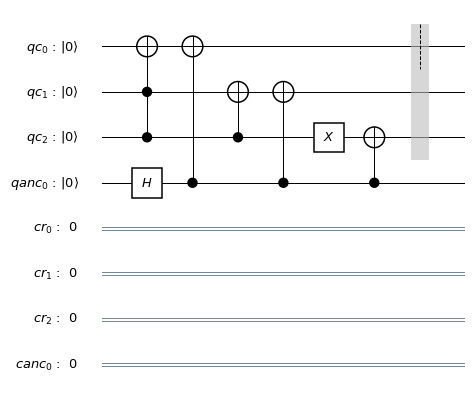

In [14]:
qnodes = QuantumRegister(n,'qc')
qsubnodes = QuantumRegister(1,'qanc')
csubnodes = ClassicalRegister(1,'canc')
cnodes = ClassicalRegister(n,'cr')

qwc = QuantumCircuit(qnodes,qsubnodes,cnodes,csubnodes)

runQWC()
qwc.draw(output='mpl')


AttributeError: 'LightSource' object has no attribute 'direction'

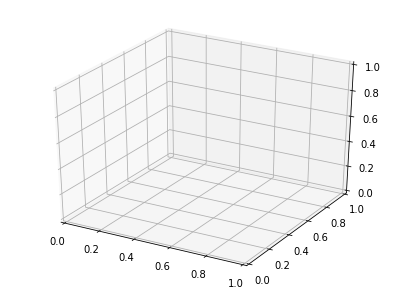

In [26]:
sv = stateVectorGenerator(qwc)
plot_state_city(sv, title='Bell state')


AttributeError: 'LightSource' object has no attribute 'direction'

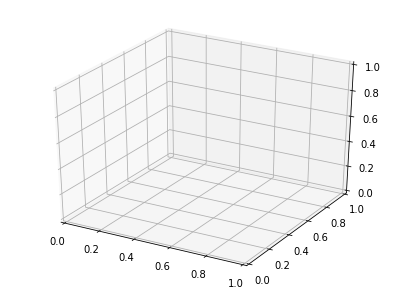

In [20]:
qwc.measure(qnodes, cnodes)
sv = stateVectorGenerator(qwc)
plot_state_city(sv, title='state post-measurement')


# 471071fc24f40345e8d90c5a1041ea2ce1c1368439dfcf7a6abd11dbf317e11fae69b7461038d2600771ce24057b5545ea3366db352dd2904aea970464916264

n-qubit toffoli

In [27]:
def cnx(qc,*qubits):
    if len(qubits) >= 3:
        last = qubits[-1]
        #A matrix: (made up of a  and Y rotation, lemma4.3)
        qc.crz(np.pi/2,qubits[-2],qubits[-1])
        #cry
        qc.cu3(pi/2, 0, 0, qubits[-2],qubits[-1])
        
        #Control not gate
        cnx(qc,*qubits[:-2],qubits[-1])
        
        #B matrix (cry again, but opposite angle)
        qc.cu3(-pi/2, 0, 0, qubits[-2], qubits[-1])
        
        #Control
        cnx(qc,*qubits[:-2],qubits[-1])
        
        #C matrix (final rotation)
        qc.crz(-np.pi/2,qubits[-2],qubits[-1])
    elif len(qubits)==3:
        qc.ccx(*qubits)
    elif len(qubits)==2:
        qc.cx(*qubits)